# Pymaceuticals Refactored
### By Louis Burns

* This data exploration and visualization is similar to the homework assigned to use pandas and matplotlib. Personally, I prefer seaborn for visualization so that's what I've used here.
* I've refactored both the code and the exercises.
* This is the type of homework I graded dozens of during the boot camp.

In [1]:
# Dependencies
import seaborn as sns
import pandas as pd
import scipy.stats as st

In [2]:
# Data import and join
mouse = pd.read_csv("data/Mouse_metadata.csv")
results = pd.read_csv("data/Study_results.csv")

# Double check even though we know the data has already been cleaned
print(f"Mouse shape: {mouse.shape}, Columns: {mouse.columns}")
print()
print(f"Results shape: {results.shape}, Columns: {results.columns}")
print()
print(mouse['Mouse ID'].describe())
print()

# Since the data is cleaned, the join type doesn't matter here
data = pd.merge(results, mouse, on="Mouse ID")

print(f"Merged dataframe shape: {data.shape}")
data.head()

Mouse shape: (249, 5), Columns: Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

Results shape: (1893, 4), Columns: Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

count      249
unique     249
top       o795
freq         1
Name: Mouse ID, dtype: object

Merged dataframe shape: (1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
# Checking the range of our numeric variables
data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [5]:
# Create a summary statistics table for total tumor volume
summary_table = (data
    .groupby("Drug Regimen")
    .agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
                )
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

From this table we see that the lowest median tumor volumes were through the Capomulin and Ramicane treatments. Let's do the same for the number of metastatic sites (number of tumors).

In [6]:
# Create a summary statistics table for total tumor volume
summary_table_2 = (data
    .groupby("Drug Regimen")
    .agg({"Metastatic Sites":["mean","median","var","std","sem"]})
                )
summary_table_2

Metastatic Sites                                     
                         mean median       var       std       sem
Drug Regimen                                                      
Capomulin            0.713043      0  0.720790  0.848993  0.055981
Ceftamin             1.179775      1  1.402527  1.184283  0.088766
Infubinol            0.960674      1  1.054942  1.027104  0.076985
Ketapril             1.297872      1  1.942883  1.393873  0.101659
Naftisol             1.182796      1  1.479919  1.216519  0.089200
Placebo              1.441989      1  1.792449  1.338824  0.099514
Propriva             0.975155      1  1.174379  1.083688  0.085407
Ramicane             0.548246      0  0.477838  0.691259  0.045780
Stelasyn             0.872928      1  0.944874  0.972046  0.072252
Zoniferol            1.230769      1  1.559711  1.248884  0.092573

Ramicane and Capomulin both come out on top again with a median of zero. In the original homework, students were asked to create histograms showing the number of data points and pie charts showing the percentage of male and female. I'm more interested in drug performance since those charts didn't show anything interesting.

Let's compare those top two performers to the Placebo. To compare means, we need to use the t-test. Our basic hypothesis is that both treatments are better than the placebo at reducing overall tumor volume. Then we'll test whether Ramicane is significantly better than Capomulin based on this trial.

In [7]:
# Construct our means
cap_means = data[data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ram_means = data[data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
pla_means = data[data['Drug Regimen'] == 'Placebo']['Tumor Volume (mm3)']

print(f'Capomulin mean of means: {cap_means.mean()}')
print(f'Ramicane mean of means: {ram_means.mean()}')
print(f'Placebo mean of means: {pla_means.mean()}')

Capomulin mean of means: 40.675741141
Ramicane mean of means: 40.21674506671053
Placebo mean of means: 54.03358078635359


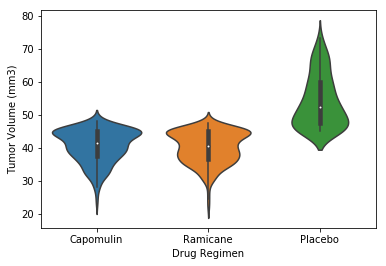

In [8]:
# Compare our means visually first
treatments = ['Capomulin', 'Ramicane', 'Placebo']
data_slice = data[data['Drug Regimen'].isin(treatments)]
sns.violinplot(x='Drug Regimen', y="Tumor Volume (mm3)", data=data_slice)

In [9]:
# Test Capomulin against the placebo
# Since the variances weren't homogenous, we indicate such
st.ttest_ind(cap_means, pla_means, equal_var=False)

Ttest_indResult(statistic=-19.99251564749819, pvalue=1.5647382727825386e-56)

Since we have a p-value of 1.5 e-5, we can reject the null hypothesis that the means are the same. Let's go on to see if Ramicane is statistically better than Capomulin.

In [10]:
st.ttest_ind(ram_means, cap_means, equal_var=False)

Ttest_indResult(statistic=-0.9980996664586762, pvalue=0.31876061261381256)

Since the p-value is 0.3, we cannot reject the null hypothesis that the two treatments are statistically different. Let's quickly check the same thing for metastatic sites.

In [11]:
cap_sites = data[data['Drug Regimen'] == 'Capomulin']['Metastatic Sites']
ram_sites = data[data['Drug Regimen'] == 'Ramicane']['Metastatic Sites']

print(f'Capomulin mean of sites: {cap_sites.mean()}')
print(f'Ramicane mean of sites: {ram_sites.mean()}')

st.ttest_ind(ram_sites, cap_sites, equal_var=False)

Capomulin mean of sites: 0.7130434782608696
Ramicane mean of sites: 0.5482456140350878


Ttest_indResult(statistic=-2.2788473238306826, pvalue=0.02315506402085276)

### Discussion

Here we can see that with a p-value of 0.02, we can reject the null hypothesis after all. Both treatments are significantly better than the placebo. And Ramicane is significantly better than Capomulin if you compare the number of metastatic sites over and above the total tumor volume. What that means is that with one treatment you get fewer but bigger tumors and with the other you get more tumors but smaller in volume.

The original homework had the students compare the means of four in a boxplot, Capomulin in a line chart (volume over time - it decreased), and plot a regression line showing that as mouse weight increased, so did the tumor volume. Those are all fairly intuitive (if not obvious) results so I don't replicate them here. 

Credit: The tumor volume statistics summary table was from the assignment. The rest is my own work.